In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [16]:
## lOAD pREDICTION 

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Load cleaned dataset
df = pd.read_csv("data/processed/twitter_depression_cleaned.csv")
X = df['post_text'].fillna("")
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train models again (to get predictions)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_tfidf, y_train)
y_pred_lr = log_reg.predict(X_test_tfidf)

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)


preds_df = pd.read_csv("data/predictions/model_predictions.csv")
print(preds_df.head())

# Extract again
y_test = preds_df["y_test"]
y_pred_lr = preds_df["LogReg"]
y_pred_nb = preds_df["NaiveBayes"]
y_pred_rf = preds_df["RandomForest"]


In [24]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load predictions (already done)
# preds_df = pd.read_csv("data/predictions/model_predictions.csv")

y_test = preds_df["y_test"]
y_pred_lr = preds_df["LogReg"]
y_pred_nb = preds_df["NaiveBayes"]
y_pred_rf = preds_df["RandomForest"]

# Collect results
results = []

results.append(["Logistic Regression",
                accuracy_score(y_test, y_pred_lr),
                precision_score(y_test, y_pred_lr),
                recall_score(y_test, y_pred_lr),
                f1_score(y_test, y_pred_lr)])

results.append(["Naive Bayes",
                accuracy_score(y_test, y_pred_nb),
                precision_score(y_test, y_pred_nb),
                recall_score(y_test, y_pred_nb),
                f1_score(y_test, y_pred_nb)])

results.append(["Random Forest",
                accuracy_score(y_test, y_pred_rf),
                precision_score(y_test, y_pred_rf),
                recall_score(y_test, y_pred_rf),
                f1_score(y_test, y_pred_rf)])

# Create DataFrame
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1-Score"])
print(results_df)


                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression   0.76425   0.772845  0.7485  0.760478
1          Naive Bayes   0.77025   0.756526  0.7970  0.776236
2        Random Forest   0.73700   0.742828  0.7250  0.733806


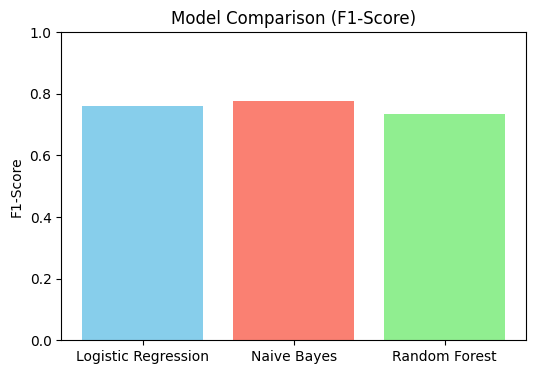

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(results_df["Model"], results_df["F1-Score"], color=['skyblue','salmon','lightgreen'])
plt.title("Model Comparison (F1-Score)")
plt.ylabel("F1-Score")
plt.ylim(0,1)
plt.show()


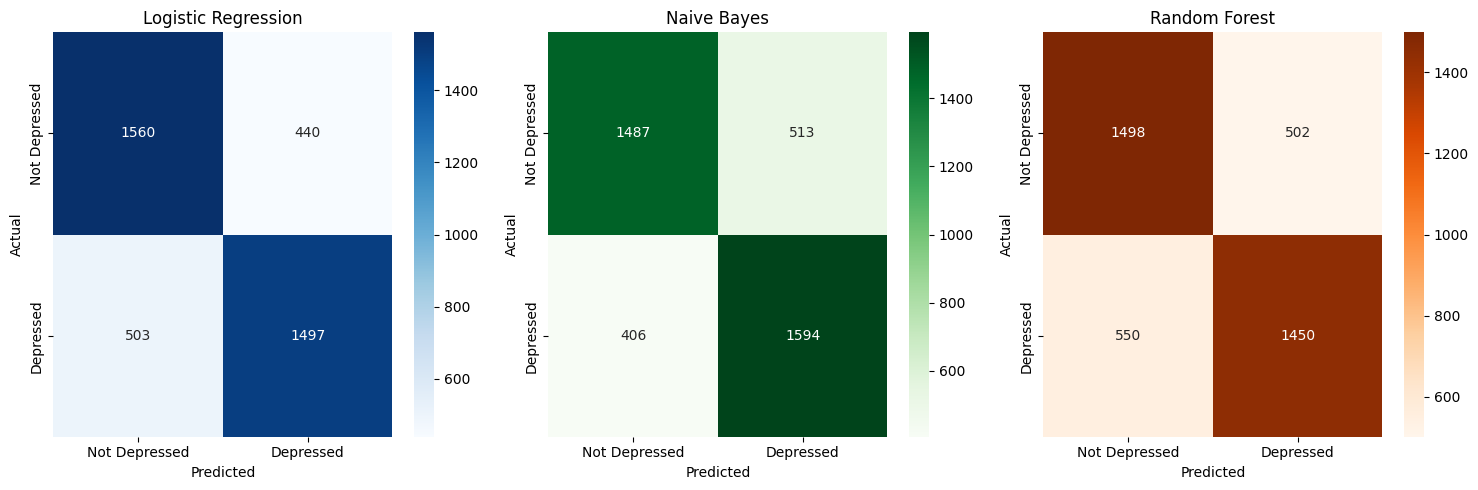

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot side by side
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Depressed','Depressed'],
            yticklabels=['Not Depressed','Depressed'], ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Depressed','Depressed'],
            yticklabels=['Not Depressed','Depressed'], ax=axes[1])
axes[1].set_title("Naive Bayes")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Depressed','Depressed'],
            yticklabels=['Not Depressed','Depressed'], ax=axes[2])
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [27]:
# Find the best model based on F1-score
best_model = results_df.loc[results_df['F1-Score'].idxmax()]

print("✅ Best Model is:", best_model['Model'])
print("Metrics:")
print(best_model)


✅ Best Model is: Naive Bayes
Metrics:
Model        Naive Bayes
Accuracy         0.77025
Precision       0.756526
Recall             0.797
F1-Score        0.776236
Name: 1, dtype: object


In [33]:
import joblib
import os

# Make sure models folder exists
os.makedirs("models", exist_ok=True)

# Save Naive Bayes model
joblib.dump(nb, "models/naive_bayes_model.pkl")

# Save TF-IDF vectorizer (important for preprocessing later)
joblib.dump(tfidf, "models/tfidf_vectorizer.pkl")

print("✅ Naive Bayes model and TF-IDF vectorizer saved successfully!")


✅ Naive Bayes model and TF-IDF vectorizer saved successfully!


In [34]:
# Load model
loaded_nb = joblib.load("models/naive_bayes_model.pkl")

# Load TF-IDF
loaded_tfidf = joblib.load("models/tfidf_vectorizer.pkl")
# Example prediction
sample_text = ["I feel very hopeless today"]
sample_tfidf = loaded_tfidf.transform(sample_text)
print("Prediction:", loaded_nb.predict(sample_tfidf))


Prediction: [1]


In [30]:
import os

#Check for pickle files
print("Naive Bayes model exists:", os.path.exists("models/naive_bayes_model.pkl"))
print("TF-IDF vectorizer exists:", os.path.exists("models/tfidf_vectorizer.pkl"))

# Agar root level models folder me check karna hai
print("Naive Bayes model exists (root models):", os.path.exists("models/naive_bayes_model.pkl"))
print("TF-IDF vectorizer exists (root models):", os.path.exists("models/tfidf_vectorizer.pkl")) 


Naive Bayes model exists: True
TF-IDF vectorizer exists: True
Naive Bayes model exists (root models): True
TF-IDF vectorizer exists (root models): True
